<h1>Heap sort</h1>

<h2>lists in python</h2>


In [1]:
# lists in python can be created with square bracket notation
L = [1, 2, 3, "hello world", None, True]

In [2]:
# they are zero indexed as usual
L[5]

True

In [3]:
#crate lists with the list() function
list([1,2,3,4])

[1, 2, 3, 4]

In [4]:
L[-3]

'hello world'

In [5]:
# in-built function for creating iterables
list(range(0, 20, 2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [6]:
# in-built function for creating iterables
L = list(range(20))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [7]:
#list slicing
L[1:10:2]

[1, 3, 5, 7, 9]

In [9]:
#quick way to cycle the list to the left
i = 5
L[i:] + L[:i]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4]

In [12]:
# tupled -- immutable
T = (1, 2, 3, 4)


In [13]:
T[0]

1

In [14]:
T[3:]

(4,)

In [15]:
# tuples are created with commas, as opposed to round brackets
T = 1, 2, 3, 4
T

(1, 2, 3, 4)

In [16]:
hash(T)

590899387183067792

In [17]:
# you can use tuples for assignment
a, b = 3, 4

In [18]:
a

3

In [19]:
b

4

In [20]:
#nice trick for swapping two values
a, b = b, a

In [21]:
a

4

In [22]:
L = list(range(10))

In [24]:
# list comprehension
[i**3 for i in L]

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [25]:
# curve ball
L[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

<br>
<H1>bubble sort </H1>

In [27]:
#import a module from the standard library
import random

In [28]:
# create a list of integers
L = list(range(1, 11))
L


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
#shuffle the list
random.shuffle(L)

In [30]:
L

[5, 7, 2, 4, 9, 6, 1, 10, 8, 3]

In [35]:
# bubble sort

#keep track of number of comparisons
no_comparisons = 0

# bubble every (biggest) element up
for j in range(len(L) - 1):
    # compare all elements that are side by side
    for i in range(len(L) - 1):
        # keep track of any swaps
        swapped = False
        #compare the ith element with the (i+1)th
        if L[i] > L[i+1]:
            # swap the elements
            L[i], L[i+1] = L[i+1], L[i]
            # keep track of the swap
            swapped = True
         #add a comparison
        no_comparisons = no_comparisons + 1
      #quit if we didn't make any swaps
    if not swapped:
        break


In [33]:
L

[5, 2, 4, 7, 6, 1, 9, 8, 3, 10]

<h2> no comparison </h2>

In [21]:
# Bubble sort as a function.
def bubble_sort(L):
    # Keep track of number of comparisons.
    no_comparisons = 0

    # Bubble every (biggest) element up.
    for j in range(len(L) - 1):
        # Keep track of any swaps.
        swapped = False
        # Compare all elements that are side by side.
        for i in range(len(L) - 1 - j):
            # Compare the ith element with the (i+1)th.
            if L[i] > L[i+1]:
                # Swap the elements.
                L[i], L[i+1] = L[i+1], L[i]
                # Keep track of the swap.
                swapped = True
            # Add a comparison.
            no_comparisons = no_comparisons + 1
        # Quit if we didn't make any swaps.
        if not swapped:
            break
    # Return the number of comparisons made.
    return no_comparisons

In [40]:
#create a list 
L = list(range(1, 11))

#shuffle 
random.shuffle(L)

#Look at it
L

[2, 4, 5, 6, 9, 8, 3, 10, 1, 7]

<h1>Heap Sort</h1>

In [6]:
import math

In [25]:
def siftDown(L, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        # Is the parent smaller than the left child?
        if L[swap] < L[lchild]:
            # Then swap is set to index of left child.
            swap = lchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and L[swap] < L[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            L[parent], L[swap] = L[swap], L[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

In [23]:
def heapsort(L):
    """Sorts the list L in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # Turn L into a max heap.
    # Index of the last element.
    last_element = len(L) - 1
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = no_comparisons + siftDown(L, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    for end in range(last_element, 0, -1):
        # Swap the element at index 0 with the element at index end.
        L[0], L[end] = L[end], L[0]
        # Fix the heap - the root is currently out of place.
        no_comparisons = no_comparisons + siftDown(L, 0, end - 1)
    
    # Return the number of comparisons.
    return no_comparisons

In [45]:
# Perform heap sort, show number of comparisons.
L = [19, 100, 36, 25, 3, 17, 7, 1, 2]
no_comparisons = heapsort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 12)

In [49]:
# Perform bubble sort, show number of comparisons.
L = [19, 100, 36, 25, 3, 17, 7, 1, 2]
no_comparisons = bubble_sort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 36)

In [26]:
# A module full of combinatorial functions.
import itertools

# Length of example list.
n = 5

# Loop through all permutations of the list of integers from 0 to n.
for perm in itertools.permutations(range(n)):
    L = list(perm)
    bubb_comp = bubble_sort(L)
    L = list(perm)
    heap_comp = heapsort(L)
    print(f'{str(perm)[1:-1]}|{bubb_comp}|{heap_comp}')

0, 1, 2, 3, 4|4|8
0, 1, 2, 4, 3|7|9
0, 1, 3, 2, 4|7|7
0, 1, 3, 4, 2|9|8
0, 1, 4, 2, 3|7|8
0, 1, 4, 3, 2|9|6
0, 2, 1, 3, 4|7|6
0, 2, 1, 4, 3|7|7
0, 2, 3, 1, 4|9|8
0, 2, 3, 4, 1|10|6
0, 2, 4, 1, 3|9|6
0, 2, 4, 3, 1|10|7
0, 3, 1, 2, 4|7|7
0, 3, 1, 4, 2|9|5
0, 3, 2, 1, 4|9|9
0, 3, 2, 4, 1|10|7
0, 3, 4, 1, 2|9|5
0, 3, 4, 2, 1|10|6
0, 4, 1, 2, 3|7|6
0, 4, 1, 3, 2|9|4
0, 4, 2, 1, 3|9|8
0, 4, 2, 3, 1|10|6
0, 4, 3, 1, 2|9|7
0, 4, 3, 2, 1|10|5
1, 0, 2, 3, 4|7|9
1, 0, 2, 4, 3|7|7
1, 0, 3, 2, 4|7|8
1, 0, 3, 4, 2|9|6
1, 0, 4, 2, 3|7|7
1, 0, 4, 3, 2|9|5
1, 2, 0, 3, 4|9|7
1, 2, 0, 4, 3|9|8
1, 2, 3, 0, 4|10|6
1, 2, 3, 4, 0|10|7
1, 2, 4, 0, 3|10|5
1, 2, 4, 3, 0|10|6
1, 3, 0, 2, 4|9|8
1, 3, 0, 4, 2|9|6
1, 3, 2, 0, 4|10|7
1, 3, 2, 4, 0|10|8
1, 3, 4, 0, 2|10|4
1, 3, 4, 2, 0|10|5
1, 4, 0, 2, 3|9|7
1, 4, 0, 3, 2|9|5
1, 4, 2, 0, 3|10|6
1, 4, 2, 3, 0|10|7
1, 4, 3, 0, 2|10|5
1, 4, 3, 2, 0|10|6
2, 0, 1, 3, 4|7|7
2, 0, 1, 4, 3|7|5
2, 0, 3, 1, 4|9|7
2, 0, 3, 4, 1|10|5
2, 0, 4, 1, 3|9|9
2, 0, 4, 3, 1|10|7
2, 1, 0,

In [30]:
# Like Excel for Python
import pandas as pd

In [28]:
# Length of example list.
n = 9

results = [[str(perm)[1:-1], bubble_sort(list(perm)), heapsort(list(perm))] for perm in itertools.permutations(range(n))]

In [31]:
df = pd.DataFrame(results, columns=['list', 'bubble', 'heap'])

In [32]:
df.head()

,list,bubble,heap
0,"0, 1, 2, 3, 4, 5, 6, 7, 8",8,25
1,"0, 1, 2, 3, 4, 5, 6, 8, 7",15,23
2,"0, 1, 2, 3, 4, 5, 7, 6, 8",15,24
3,"0, 1, 2, 3, 4, 5, 7, 8, 6",21,24
4,"0, 1, 2, 3, 4, 5, 8, 6, 7",15,22


<h1> extras </h1>

In [2]:
#list 
a = 1

# functions a is a reference
def change(b):
    b = 2

# pass a has change
change(a)

# a has changed
print(a)

1


In [1]:
#list 
a = [1,2,3,4]

# functions a is a reference
def change(b):
    b[2] = 100
    
# pass a has change
change(a)

# a has changed
print(a)

[1, 2, 100, 4]


<h1> end </h1>

In [6]:
#plots 
import matplotlib.pyplot as plt

In [7]:
# Change default plot size.
plt.rcParams["figure.figsize"] = (20, 8)

In [8]:
# Graphs.
import networkx as nx

In [9]:
# Math functions.
import math

In [10]:
# Numerical and random functions.
import numpy as np

In [11]:
# Set up the random number generator - setting seed means we get same random sequence each time.
rng = np.random.default_rng(seed=0)

In [12]:
# Shuffle a list of integers.
L = list(rng.permutation(10))
L

[4, 6, 2, 7, 3, 5, 9, 0, 8, 1]

<h1>Heap Sort Continuation</h1>

In [2]:
def drawtree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

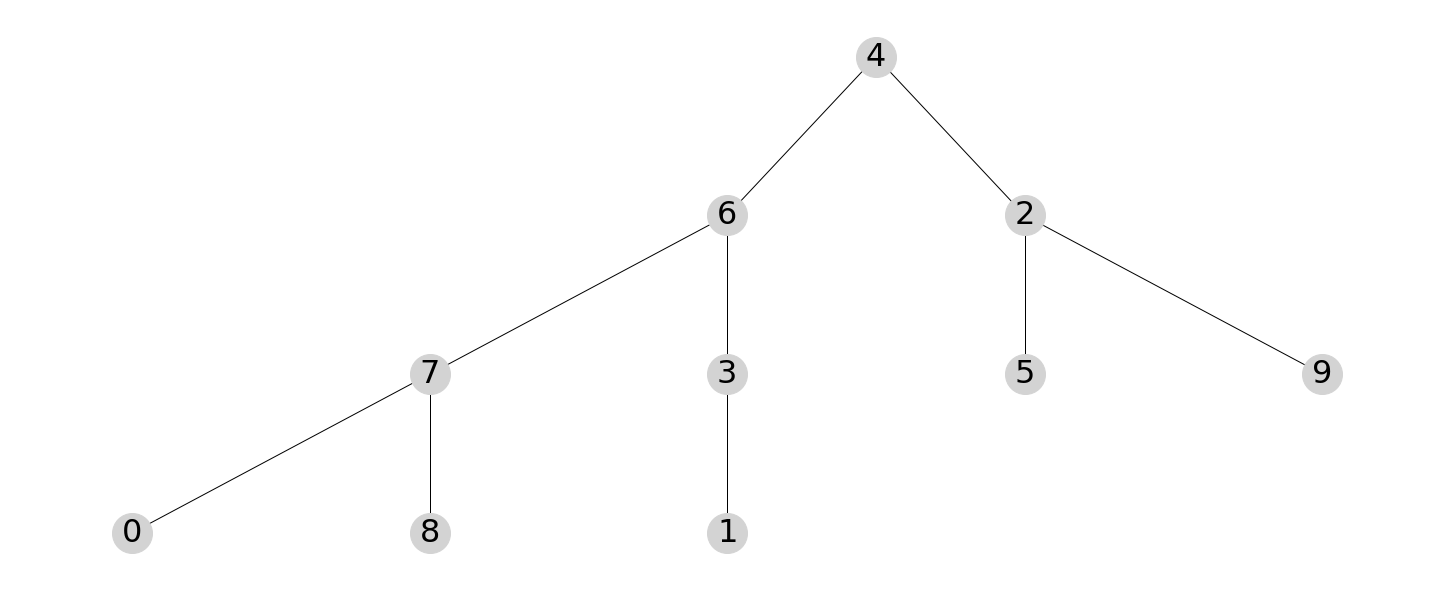

In [13]:

drawtree(L)

In [66]:
S = []

In [67]:
S = [L[0]] + S

In [68]:
S

[4]

In [69]:
L[0], L[-1] = L[-1], L[0]

In [70]:
L

[1, 6, 2, 7, 3, 5, 9, 0, 8, 4]

In [71]:
L = L[:-1]
L

[1, 6, 2, 7, 3, 5, 9, 0, 8]

In [72]:
L, S

([1, 6, 2, 7, 3, 5, 9, 0, 8], [4])

In [73]:
L[1], L[3] = L[3], L[1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

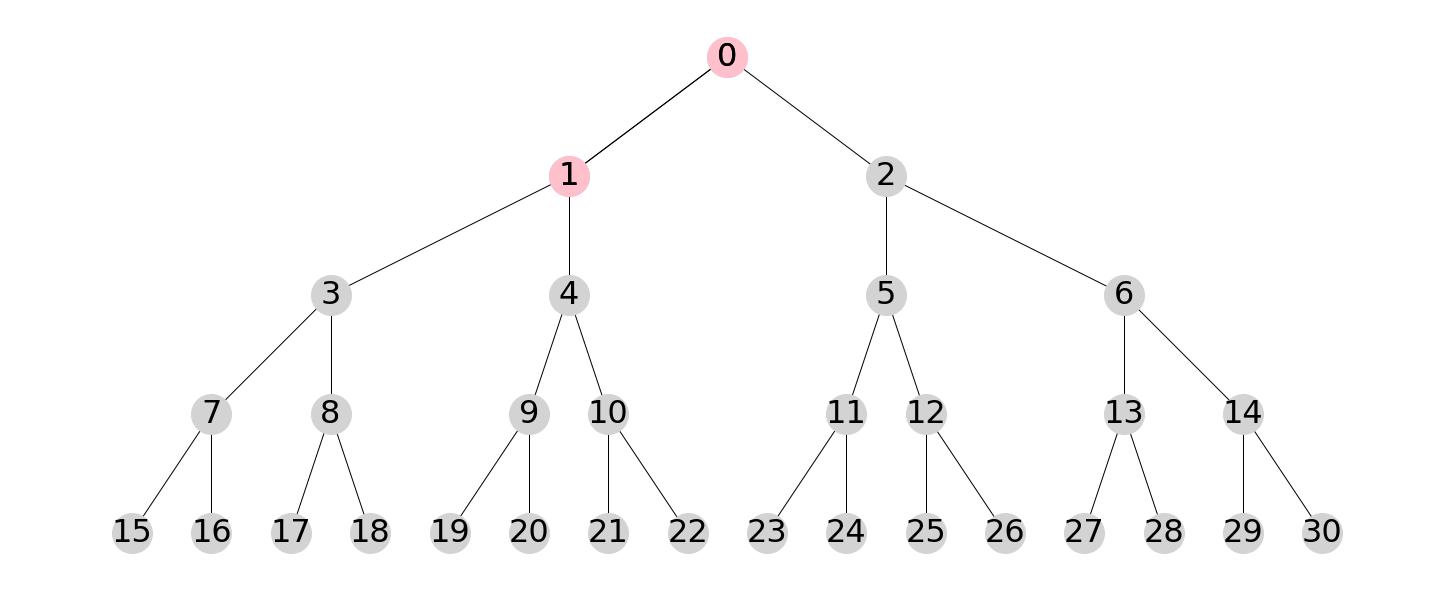

In [15]:
drawtree(L, [0, 1])
L

<h1>Log n </h1>

In [1]:
2**4

16

In [2]:
2**(-4)

0.0625

In [3]:
2**(0.5)

1.4142135623730951

In [4]:
import math

In [5]:
math.log(2, 2)

1.0

<h1>Height Of The Tree </h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


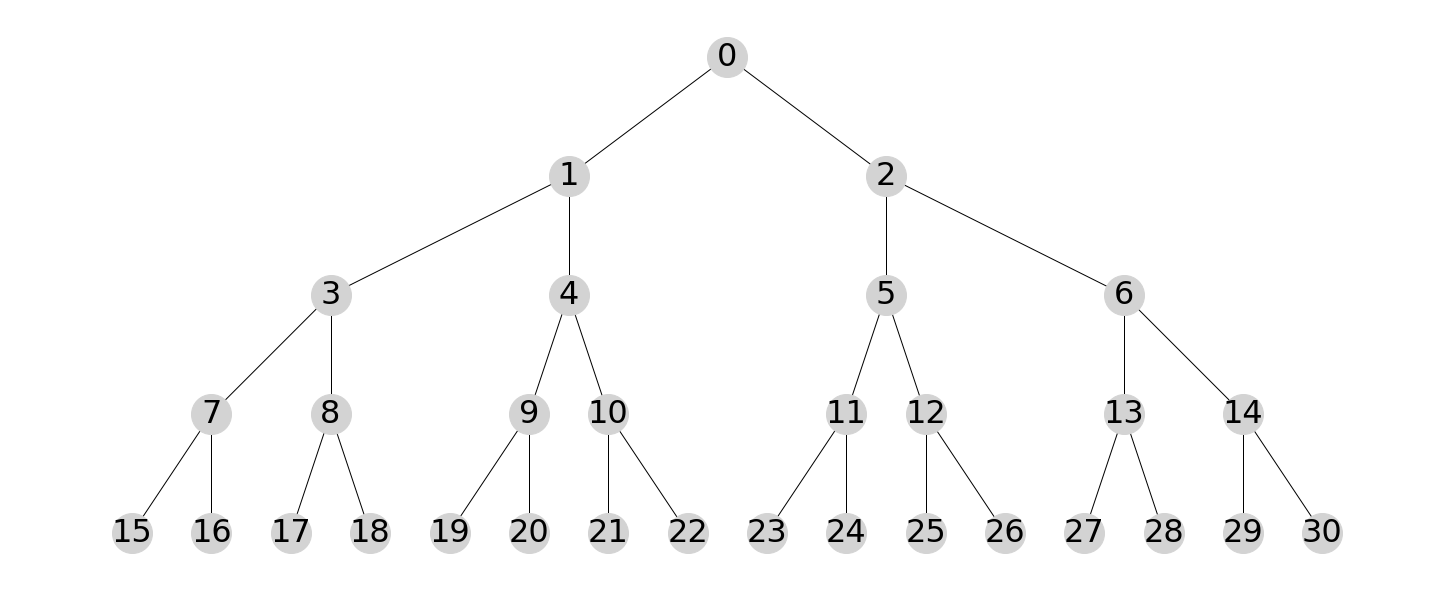

In [14]:
# Length of the list.
n = 31
# Create a list of length n.
L = list(range(n))
# Show the list.
print(L)
# Draw the tree from L.
drawtree(L)

In [10]:
2**0 + 2**1 + 2**2 + 2**3 + 2**4

31

In [11]:
def max_list_length(height):
    total_nodes = 0
    for i in range(height + 1):
        total_nodes = total_nodes + 2**i
    return total_nodes

In [12]:
max_list_length(4)

31

In [13]:
2**5

32

In [14]:
max_list_length(10)

2047

In [15]:
2**11

2048

In [16]:
0b011111111

255

In [17]:
(1 * 2**7) + (1 * 2**6) + (1 * 2**5) + (1 * 2**4) + (1 * 2**3) + (1 * 2**2) + (1 * 2**1) + (1 * 2**0)

255

In [18]:
0b100000000 - 0b1

255

In [19]:
def max_list_length(height):
    return 2**(height+1) - 1

In [20]:
max_list_length(4)

31

In [21]:
max_list_length(10)

2047

In [22]:
for length in range(32, 0, -1):
    print(f'{length:2}\t {math.log(length, 2):2.3}')

32	 5.0
31	 4.95
30	 4.91
29	 4.86
28	 4.81
27	 4.75
26	 4.7
25	 4.64
24	 4.58
23	 4.52
22	 4.46
21	 4.39
20	 4.32
19	 4.25
18	 4.17
17	 4.09
16	 4.0
15	 3.91
14	 3.81
13	 3.7
12	 3.58
11	 3.46
10	 3.32
 9	 3.17
 8	 3.0
 7	 2.81
 6	 2.58
 5	 2.32
 4	 2.0
 3	 1.58
 2	 1.0
 1	 0.0


<h1>Big O</h1>

In [65]:
n = np.arange(0.1, 1000.1, 0.1)

y1 = n**2

y2 = n * np.log(n)

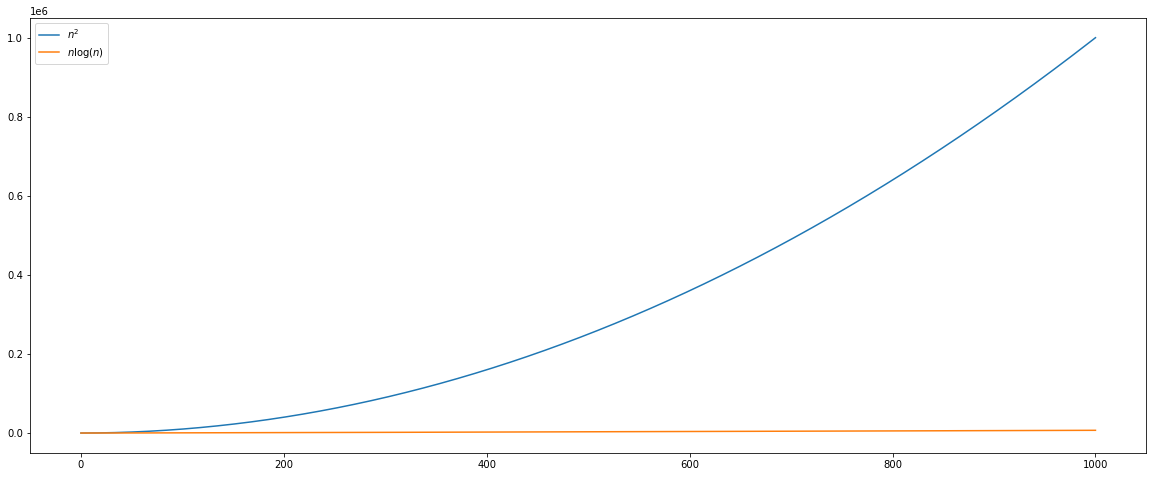

In [66]:
plt.plot(n, y1, label='$n^2$')
plt.plot(n, y2, label='$n \log(n)$')

plt.legend()

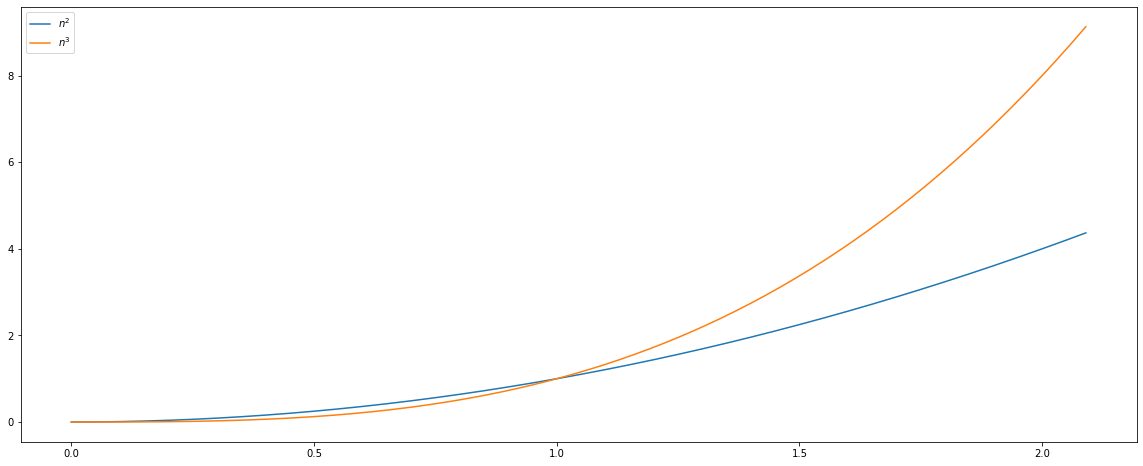

In [67]:
n = np.arange(0.0, 2.1, 0.01)

plt.plot(n, n**2, label='$n^2$')
plt.plot(n, n**3, label='$n^3$')

plt.legend()

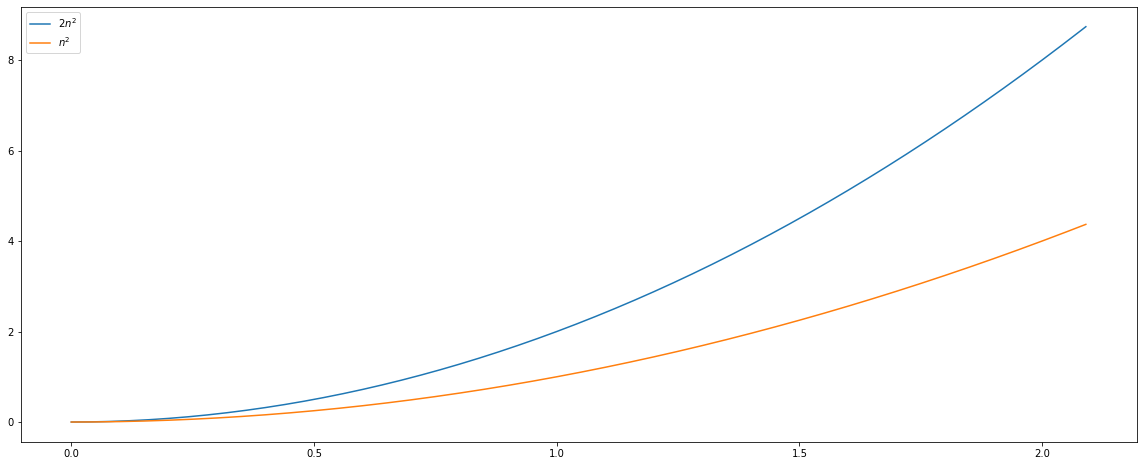

In [68]:
n = np.arange(0.0, 2.1, 0.01)

plt.plot(n, 2.0 * (n**2), label='$2n^2$')
plt.plot(n, n**2, label='$n^2$')

plt.legend()